# **Actividad Regresión Lineal 1**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/ds_salaries.csv',index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.drop(df.columns[[0,3,5,7,9,10]], axis = 1, inplace=True)

In [4]:
df.isnull().sum()

experience_level    0
employment_type     0
salary              0
salary_in_usd       0
remote_ratio        0
dtype: int64

In [5]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [6]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [7]:
dummies1 = pd.get_dummies(df['experience_level'], prefix = 'Experience')
dummies2 = pd.get_dummies(df['employment_type'], prefix = 'Employment')

In [8]:
dummies1

,Experience_EN,Experience_EX,Experience_MI,Experience_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
602,0,0,0,1
603,0,0,0,1
604,0,0,0,1
605,0,0,0,1


In [9]:
dummies2

,Employment_CT,Employment_FL,Employment_FT,Employment_PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
602,0,0,1,0
603,0,0,1,0
604,0,0,1,0
605,0,0,1,0


In [10]:
df = pd.concat([df, dummies1, dummies2], axis = 1)

In [11]:
df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,Experience_EN,Experience_EX,Experience_MI,Experience_SE,Employment_CT,Employment_FL,Employment_FT,Employment_PT
0,MI,FT,70000,79833,0,0,0,1,0,0,0,1,0
1,SE,FT,260000,260000,0,0,0,0,1,0,0,1,0
2,SE,FT,85000,109024,50,0,0,0,1,0,0,1,0
3,MI,FT,20000,20000,0,0,0,1,0,0,0,1,0
4,SE,FT,150000,150000,50,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,SE,FT,154000,154000,100,0,0,0,1,0,0,1,0
603,SE,FT,126000,126000,100,0,0,0,1,0,0,1,0
604,SE,FT,129000,129000,0,0,0,0,1,0,0,1,0
605,SE,FT,150000,150000,100,0,0,0,1,0,0,1,0


In [12]:
correlacion = df.corr()

<ipython-input-12-c0854e3b5557>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


In [13]:
correlacion

,salary,salary_in_usd,remote_ratio,Experience_EN,Experience_EX,Experience_MI,Experience_SE,Employment_CT,Employment_FL,Employment_FT,Employment_PT
salary,1.000000,-0.083906,-0.014608,-0.015845,0.014130,0.074626,-0.065995,-0.008268,-0.014568,0.025685,-0.020006
salary_in_usd,-0.083906,1.000000,0.132122,-0.294196,0.259866,-0.252024,0.343513,0.092907,-0.073863,0.091819,-0.144627
remote_ratio,-0.014608,0.132122,1.000000,-0.010490,0.041208,-0.127850,0.113071,0.065149,-0.016865,-0.023834,-0.002935
Experience_EN,-0.015845,-0.294196,-0.010490,1.000000,-0.087108,-0.302761,-0.381033,0.066013,-0.033537,-0.167828,0.204028
Experience_EX,0.014130,0.259866,0.041208,-0.087108,1.000000,-0.155539,-0.195751,0.070739,-0.017229,-0.008698,-0.027379
Experience_MI,0.074626,-0.252024,-0.127850,-0.302761,-0.155539,1.000000,-0.680373,-0.028817,0.068108,-0.006597,-0.013805
Experience_SE,-0.065995,0.343513,0.113071,-0.381033,-0.195751,-0.680373,1.000000,-0.047768,-0.034520,0.128381,-0.119762
Employment_CT,-0.008268,0.092907,0.065149,0.066013,0.070739,-0.028817,-0.047768,1.000000,-0.007423,-0.506989,-0.011795
Employment_FL,-0.014568,-0.073863,-0.016865,-0.033537,-0.017229,0.068108,-0.034520,-0.007423,1.000000,-0.453089,-0.010541
Employment_FT,0.025685,0.091819,-0.023834,-0.167828,-0.008698,-0.006597,0.128381,-0.506989,-0.453089,1.000000,-0.719987


In [14]:
alta_corr = np.where((correlacion > 0.95)&(correlacion < 1))

In [15]:
alta_corr

(array([], dtype=int64), array([], dtype=int64))

In [16]:
baja_corr = np.where((correlacion < 0.95)&(correlacion > 1))

In [17]:
baja_corr

(array([], dtype=int64), array([], dtype=int64))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
df.drop(df.columns[[0,1]], axis = 1, inplace = True)

In [20]:
df

,salary,salary_in_usd,remote_ratio,Experience_EN,Experience_EX,Experience_MI,Experience_SE,Employment_CT,Employment_FL,Employment_FT,Employment_PT
0,70000,79833,0,0,0,1,0,0,0,1,0
1,260000,260000,0,0,0,0,1,0,0,1,0
2,85000,109024,50,0,0,0,1,0,0,1,0
3,20000,20000,0,0,0,1,0,0,0,1,0
4,150000,150000,50,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
602,154000,154000,100,0,0,0,1,0,0,1,0
603,126000,126000,100,0,0,0,1,0,0,1,0
604,129000,129000,0,0,0,0,1,0,0,1,0
605,150000,150000,100,0,0,0,1,0,0,1,0


In [21]:
df_estandar = scaler.fit_transform(df)

In [22]:
df_estandar

array([[-0.16460538, -0.45790445, -1.74361532, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-0.0414754 ,  2.08328151, -1.74361532, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-0.15488459, -0.04617667, -0.51437665, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       ...,
       [-0.12637028,  0.2355771 , -1.74361532, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-0.11276118,  0.53177399,  0.71486203, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-0.08035855,  1.23700468,  0.71486203, ..., -0.0814463 ,
         0.17975796, -0.12942341]])

In [23]:
df_estandar = pd.DataFrame(df_estandar, columns = df.columns)

In [24]:
df_estandar

,salary,salary_in_usd,remote_ratio,Experience_EN,Experience_EX,Experience_MI,Experience_SE,Employment_CT,Employment_FL,Employment_FT,Employment_PT
0,-0.164605,-0.457904,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
1,-0.041475,2.083282,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
2,-0.154885,-0.046177,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
3,-0.197008,-1.301826,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
4,-0.112761,0.531774,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
...,...,...,...,...,...,...,...,...,...,...,...
602,-0.110169,0.588192,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
603,-0.128314,0.193263,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
604,-0.126370,0.235577,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
605,-0.112761,0.531774,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423


In [25]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba = train_test_split(df_estandar, test_size = 0.20, random_state = 42)

In [26]:
entrenamiento

,salary,salary_in_usd,remote_ratio,Experience_EN,Experience_EX,Experience_MI,Experience_SE,Employment_CT,Employment_FL,Employment_FT,Employment_PT
9,-0.128962,0.179159,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
227,-0.161365,-0.333488,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
591,-0.116096,0.459192,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
516,-0.111141,0.567036,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
132,-0.185084,-1.042301,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
...,...,...,...,...,...,...,...,...,...,...,...
71,-0.185991,-0.988746,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
106,-0.057677,1.059879,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
270,-0.162985,-0.561334,0.714862,2.428524,-0.211543,-0.735261,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
435,-0.164605,-0.291738,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423


In [27]:
prueba

,salary,salary_in_usd,remote_ratio,Experience_EN,Experience_EX,Experience_MI,Experience_SE,Employment_CT,Employment_FL,Employment_FT,Employment_PT
563,-0.119080,0.394254,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
289,-0.122482,0.320205,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
76,-0.145164,-0.173457,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
78,-0.034995,2.224328,0.714862,-0.411773,-0.211543,1.360061,-0.925348,10.972693,-0.081446,-5.563036,-0.129423
182,-0.195712,-1.217128,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
...,...,...,...,...,...,...,...,...,...,...,...
249,-0.099800,0.813866,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
365,-0.120149,0.370981,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
453,-0.132203,0.108636,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
548,-0.145779,-0.186856,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423


In [28]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula='salary_in_usd~remote_ratio+Experience_EN+Experience_EX+Experience_MI+Employment_CT+Employment_FL+Employment_FT', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     23.50
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.89e-27
Time:                        22:08:25   Log-Likelihood:                -629.63
No. Observations:                 485   AIC:                             1275.
Df Residuals:                     477   BIC:                             1309.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0205      0.041      0.504

In [29]:
y_aprox = 0 - 0.3733*prueba['Experience_EN'] + 0.1854*prueba['Experience_EX'] - 0.3267*prueba['Experience_MI'] + 0 - 0 + 0

In [30]:
y_aprox

563    0.354705
289    0.354705
76    -0.329837
78    -0.329837
182   -0.329837
         ...   
249    0.354705
365    0.354705
453   -0.329837
548    0.354705
235   -0.329837
Length: 122, dtype: float64

In [31]:
tabla = pd.DataFrame({'Real': prueba['salary_in_usd'], 'Prediccion': y_aprox, 'Errores':prueba['salary_in_usd'] - y_aprox })

In [32]:
tabla

,Real,Prediccion,Errores
563,0.394254,0.354705,0.039549
289,0.320205,0.354705,-0.034500
76,-0.173457,-0.329837,0.156380
78,2.224328,-0.329837,2.554165
182,-1.217128,-0.329837,-0.887290
...,...,...,...
249,0.813866,0.354705,0.459162
365,0.370981,0.354705,0.016277
453,0.108636,-0.329837,0.438473
548,-0.186856,0.354705,-0.541561


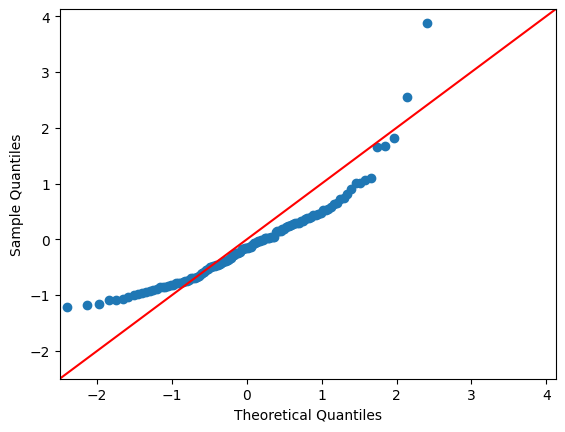

In [33]:
import statsmodels.api as sm
figura = sm.qqplot(tabla['Errores'],line='45')

Text(0, 0.5, 'Prediccion')

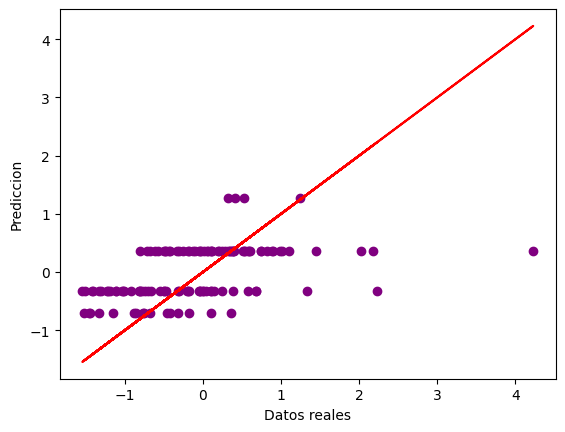

In [34]:
import matplotlib.pyplot as plt
plt.scatter(prueba['salary_in_usd'], y_aprox, color='purple')
plt.plot(prueba['salary_in_usd'], prueba['salary_in_usd'], color='red')
plt.xlabel("Datos reales")
plt.ylabel("Prediccion")

In [35]:
l_residuos=len(tabla['Errores'])

Text(0, 0.5, 'Valor del residuo')

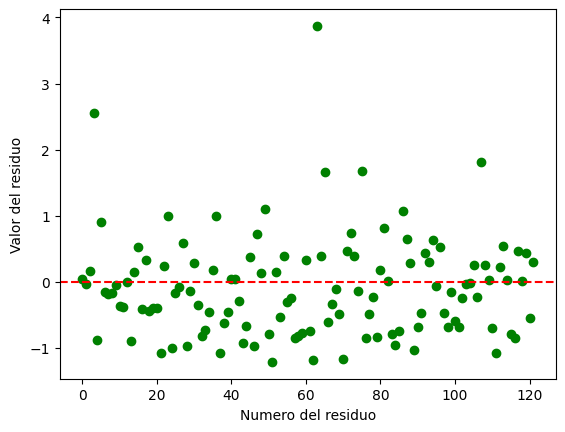

In [36]:
plt.scatter(range(l_residuos),tabla['Errores'],color='green')
plt.axhline(y=0,linestyle='--',color='red')
plt.xlabel("Numero del residuo")
plt.ylabel("Valor del residuo")

Text(0, 0.5, 'Frecuencia')

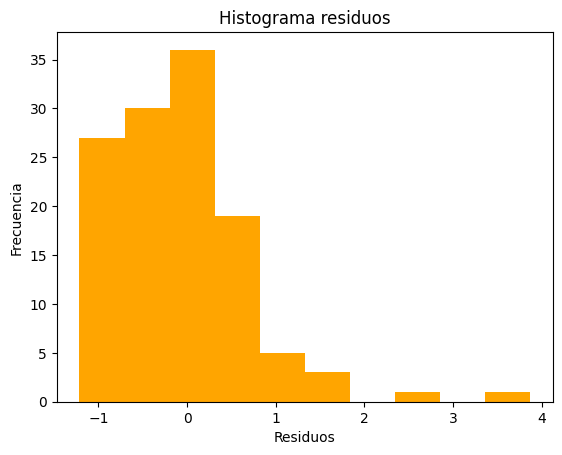

In [37]:
plt.hist(x=tabla['Errores'],color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

In [38]:
media=tabla['Errores'].mean()
std=tabla['Errores'].std()
Errores_est=(tabla['Errores']-media)/std

In [39]:
import statsmodels.api as sm
from scipy import stats
stats.kstest(Errores_est,'norm')

KstestResult(statistic=0.08255498741347389, pvalue=0.35699905243527263, statistic_location=0.1636229107442081, statistic_sign=1)